In [2]:
# import librairies
import pandas as pd
import numpy as np


from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
import sklearn
print('scikitlearn version',sklearn.__version__)


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly_express as px
import scipy.cluster.hierarchy as sch

scikitlearn version 1.0.2


ModuleNotFoundError: No module named 'plotly_express'

In [1]:
# import data 

df = pd.read_csv('data.csv', sep = ";")

NameError: name 'pd' is not defined

In [716]:
from explainerdashboard import ExplainerDashboard

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [718]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [719]:
print('Nombre de valeurs uniques pour chaque colonne :')
for col in df.columns:
    print(df[col].value_counts().count(), col)

Nombre de valeurs uniques pour chaque colonne :
200 CustomerID
2 Gender
51 Age
64 Annual Income (k$)
84 Spending Score (1-100)


In [720]:
# La fonction .describe() nous donne une vision d'ensemble (statistiques) pour chaque colonne
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



- Age : 51/200 valeurs uniques entre 18 et 70
- Income : 64/200 valeurs uniques entre 15 et 137
- Score : 84/200 valeurs uniques entre 1 et 99


In [721]:
# Supression de la colonnes CustomerID
df.drop('CustomerID', axis='columns', inplace=True)

In [722]:
# Renommage des colonnes
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'}, inplace=True)

Liste des Genres : {'Female', 'Male'}


<AxesSubplot:ylabel='Gender'>

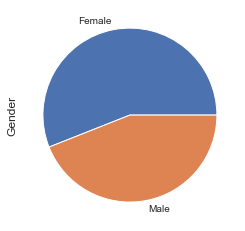

In [723]:
#Répartition des valeurs selon les types
print('Liste des Genres :', set(pd.Series(df.Gender)))
df.Gender.value_counts().plot.pie()

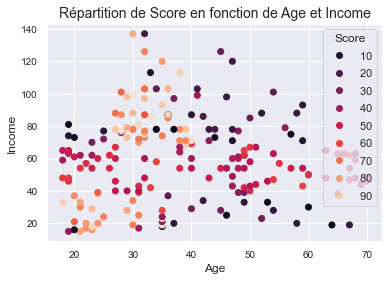

In [725]:
ax = plt.axes()
scatter = ax.scatter(df.Age,df.Income, c=df.Score)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Répartition de Score en fonction de Age et Income')
plt.legend(*scatter.legend_elements(),title="Score")
plt.show()


les clients aux meilleurs 'Score' entre 20/30 ans et de bas revenus ou entre 30/40 ans avec revenus élevés.


In [727]:
from sklearn.preprocessing import OneHotEncoder
# encodage des variables catégorielles Genre
ohe = OneHotEncoder(sparse=False)
if 'Gender' in df.columns :
    df.Gender = ohe.fit_transform(df[['Gender']])
df.head(3)

,Gender,Age,Income,Score
0,0.0,19,15,39
1,0.0,21,15,81
2,1.0,20,16,6


In [728]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Implémentation d'une méthode de selection des 4 meilleurs features
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3, step=1)
# Selection des estimateurs
X = df[['Gender','Age','Income']]
rfe = rfe.fit(X, df[['Score']])
print(X.columns[rfe.support_])


Index(['Gender', 'Age', 'Income'], dtype='object')


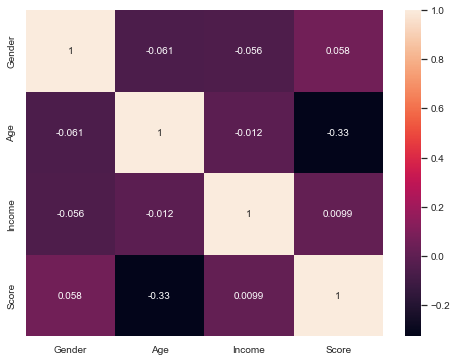

In [729]:
# matrice de correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True) # avec seaborn
plt.show()

#print("The correlation DataFrame is:")
#print(df.corr(), "\n")


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 23/23 [00:00<00:00, 283.56it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [6].
[clusteval] >Fin.


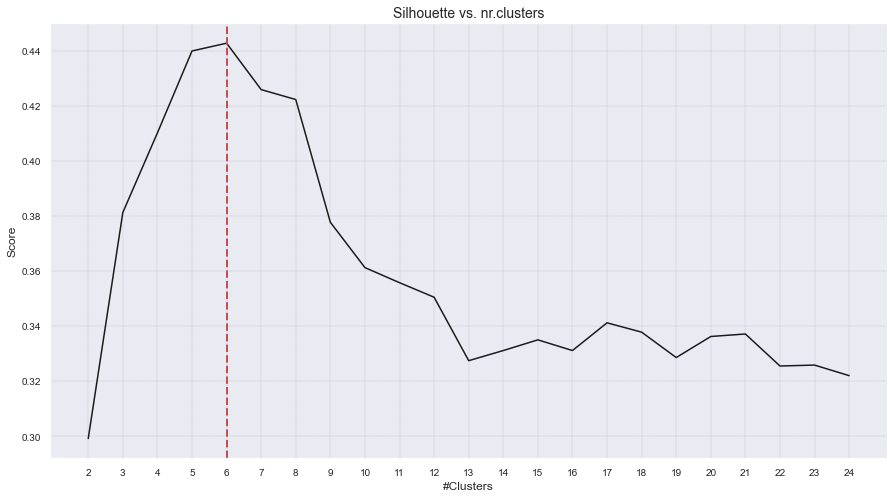

[clusteval] >Estimated number of n_clusters: 6, average silhouette_score=0.443


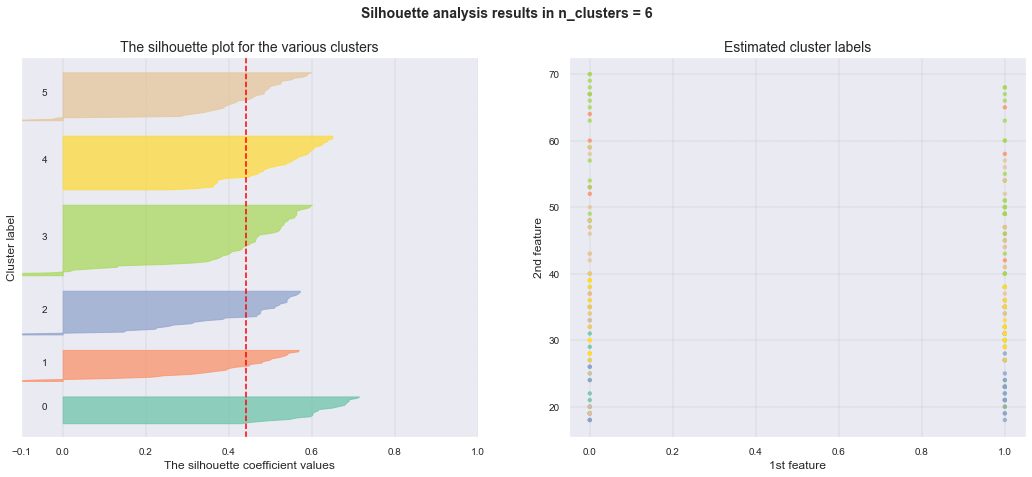

In [730]:
# Import library
from clusteval import clusteval

# Set parameters, as an example dbscan
ce = clusteval()
# Transform Dataframe to numpy array
df_array = df.to_numpy()
# Fit to find optimal number of clusters using dbscan
results= ce.fit(df_array)
# Make plot of the cluster evaluation
ce.plot()
# Make scatter plot. Note that the first two coordinates are used for plotting.
ce.scatter(df_array)
# results is a dict with various output statistics. One of them are the labels.
cluster_labels = results['labx']

In [731]:
# parametrer distance_threshold=0 calule tout l'arbre
#clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
clustering = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')


In [732]:
hc = clustering.fit(df)

In [733]:
hc.get_params()

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 6}

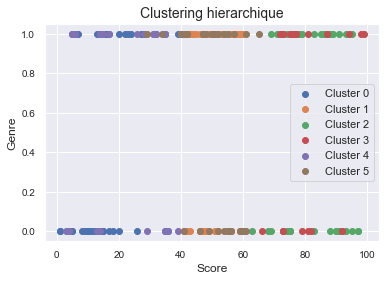

In [736]:
for i in range(0,hc.n_clusters_):
    plt.scatter(df[hc.labels_==i].Score,df[hc.labels_==i].Gender, label='Cluster '+str(i))
plt.legend()
plt.title('Clustering hierarchique')
plt.xlabel('Score')
plt.ylabel('Genre')
plt.show()

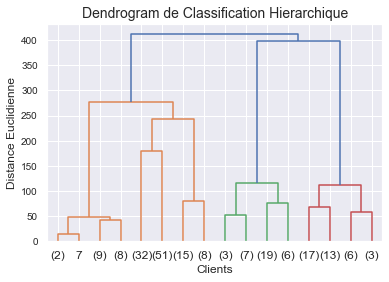

In [ ]:
# Affichage d'un dendogramme
ddg = sch.dendrogram(sch.linkage(df, method='ward', metric='euclidean', optimal_ordering=True),truncate_mode="level", p=3)
plt.title("Dendrogram de Classification Hierarchique")
# plot the top three levels of the dendrogram
plt.ylabel('Distance Euclidienne')
plt.xlabel('Clients')
plt.show()